In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl
from matplotlib.pyplot import *

In [2]:
def view_map(alm,nside,lmax,min=-.1,max=.1):
    Map = curvedsky.utils.hp_alm2map(nside,lmax,lmax,alm[:lmax+1,:lmax+1])
    hp.mollview(Map,min=min,max=max)

In [3]:
Lmax, lmax = 4096, 2048
l = np.linspace(0,lmax,lmax+1)
L = np.linspace(0,Lmax,Lmax+1)
pid = prjlib.analysis_init(t='id',ntype='cv')
plaw = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype='base_roll50')
plac = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype='base_roll50')
pcoc = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype='base_roll50')
Plaw = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype='goal_roll50')
Plac = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype='goal_roll50')
Pco = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype='goal_roll50')
vmin, vmax = -3e-6, 3e-6

In [4]:
# load windows
Msa, __ = prjlib.window('sa',ascale=0.)
Mla, wnla = prjlib.window('la',ascale=0.,nside=512)
mco = np.average(Mla)+np.average(Msa)-np.average(Mla*Msa)
print(wnla[0],mco)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


SAT mask is further multiplied by hit-count binary
0.2917563120524089 0.3514010806878408


In [5]:
W = hp.ud_grade(Msa*Mla,1024)
nside = 1024

In [6]:
Ealm = pickle.load(open(pid.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
Balm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
#Ealm = curvedsky.utils.mulwin(nside,lmax,lmax,Ealm,W)[1]

Filtered maps

In [7]:
elaw = pickle.load(open(plaw.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
blaw = pickle.load(open(plaw.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
#elaw = curvedsky.utils.mulwin(nside,lmax,lmax,elaw,W)

In [8]:
elac = pickle.load(open(plac.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
blac = pickle.load(open(plac.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
#elac = curvedsky.utils.mulwin(nside,lmax,lmax,elac,W)

In [20]:
ecoc = pickle.load(open(pcoc.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
bcoc = pickle.load(open(pcoc.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
#ecoc = curvedsky.utils.mulwin(nside,lmax,lmax,ecoc,W)

Power spectrum

In [21]:
inEE = curvedsky.utils.alm2cl(lmax,Ealm)
inBB = curvedsky.utils.alm2cl(lmax,Balm)
coEE = curvedsky.utils.alm2cl(lmax,ecoc)
coBB = curvedsky.utils.alm2cl(lmax,bcoc)
laEE = curvedsky.utils.alm2cl(lmax,elac)
laBB = curvedsky.utils.alm2cl(lmax,blac)
lawE = curvedsky.utils.alm2cl(lmax,elaw)
lawB = curvedsky.utils.alm2cl(lmax,blaw)
icEE = curvedsky.utils.alm2cl(lmax,ecoc,Ealm)
icBB = curvedsky.utils.alm2cl(lmax,bcoc,Balm)
ilEE = curvedsky.utils.alm2cl(lmax,elac,Ealm)
ilBB = curvedsky.utils.alm2cl(lmax,elac,Balm)
ilwE = curvedsky.utils.alm2cl(lmax,elaw,Ealm)
ilwB = curvedsky.utils.alm2cl(lmax,elaw,Balm)

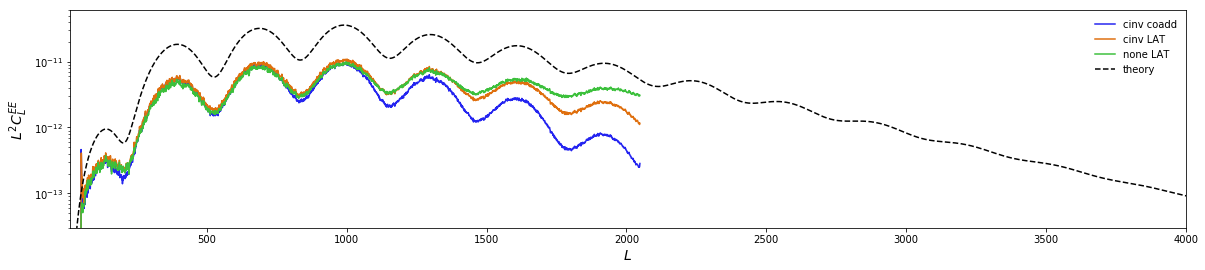

In [22]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=6e-11,ylog=True,ylab=r'$L^2C_L^{EE}$')
plot(l,coEE*l**2,label='cinv coadd')
plot(l,laEE*l**2,label='cinv LAT')
plot(l,lawE*l**2,label='none LAT')
plot(L,L**2*plaw.lEE,color='k',label='theory',ls='--')
legend()

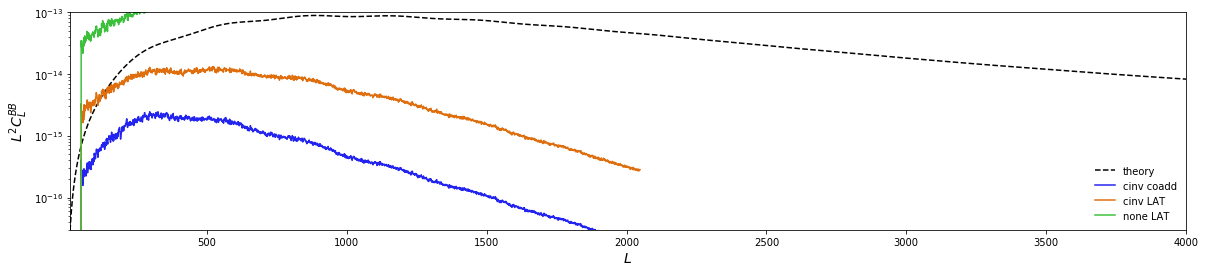

In [23]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-17,ymax=1e-13,ylog=True,ylab=r'$L^2C_L^{BB}$')
plot(L,L**2*plac.lBB,'k--',label='theory')
plot(l,coBB*l**2,label='cinv coadd')
plot(l,laBB*l**2,label='cinv LAT')
plot(l,lawB*l**2,label='none LAT')
legend()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


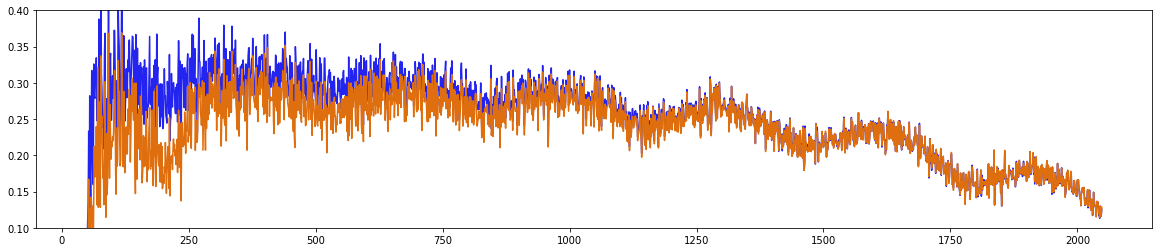

In [25]:
ylim(.1,.4)
plot(l,icEE**2/coEE/inEE)
plot(l,ilEE**2/laEE/inEE)
#plot(l,ilwE**2/lawE/inEE)